# Multi class Random Forest modelling to predict states

### Import libraries and load data

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.metrics import roc_auc_score
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))   #returns False, without Warning

False


In [3]:
##Importing data and creating dataframe 
df = pd.read_csv('firstout.csv')
df.head()

,Unnamed: 0,id,plant,size,number,auction,capacity,physical_guarantee,sold_lots,source,...,gkf,fdi,primary_energy_consumption,g,exch,inv_US$_billion,state,inv_size,physical_guarantee_size,distance_from_last_auction
0,0,1,UHE Foz do Rio Claro,0.091,11,Leilão 2/2005,68.4,41.0,41.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.120104543,GO,10918594.82,3.727273,0.798005
1,1,2,UHE São José,0.091,11,Leilão 2/2005,51.0,30.4,30.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.08931406,RS,8119460.00,2.763636,0.798005
2,2,3,UHE Passo São João,0.091,11,Leilão 2/2005,77.0,39.0,37.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.114362101,RS,10396554.64,3.545455,0.798005
3,3,4,UHE Simplício,0.091,11,Leilão 2/2005,337.7,191.3,185.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.616054447,RJ,56004949.73,17.390909,0.798005
4,4,5,UHE Retiro Baixo,0.091,11,Leilão 2/2005,82.0,38.5,36.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.112149186,MG,10195380.55,3.500000,0.798005


In [3]:
#Retrieving keys
df.keys()

Index(['Unnamed: 0', 'id', 'plant', 'size', 'number', 'auction', 'capacity',
       'physical_guarantee', 'sold_lots', 'source', 'company_consortium',
       'year', 'price_US$', 'inv_US$', 'gdp_growth', 'risk_embi', 'gkf', 'fdi',
       'primary_energy_consumption', 'g', 'exch', 'inv_US$_billion', 'state',
       'inv_size', 'physical_guarantee_size', 'distance_from_last_auction'],
      dtype='object')

In [4]:
df = df.drop(columns=['Unnamed: 0', 'id', 'plant', 'number', 'auction', 'capacity',
       'sold_lots', 'company_consortium', 'inv_US$_billion', 'g', 'size',
       'year', 'price_US$', 'gdp_growth', 'risk_embi', 'gkf', 'fdi',
       'primary_energy_consumption', 'exch',  
       'inv_size', 'physical_guarantee_size', ])
df.head()

,physical_guarantee,source,inv_US$,state,distance_from_last_auction
0,41.0,hydro,120104543.0,GO,0.798005
1,30.4,hydro,89314060.0,RS,0.798005
2,39.0,hydro,114362101.0,RS,0.798005
3,191.3,hydro,616054447.0,RJ,0.798005
4,38.5,hydro,112149186.0,MG,0.798005


### Factorizing the non-numeric variables

In [5]:
#Factorize source
factor = pd.factorize(df['source'])
df.source = factor[0]
definitions = factor[1]
print(df.source.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: source, dtype: int64
Index(['hydro', 'coal', 'sugar cane bagasse', 'diesel oil', 'others',
       'fuel oil', 'biomass', 'natural gas', 'wind', 'solar', 'biogas'],
      dtype='object')


In [6]:
#Factorize state
factor2 = pd.factorize(df['state'])
df.state = factor2[0]
definitions2 = factor2[1]
print(df.state.head())
print(definitions2)

0    0
1    1
2    1
3    2
4    3
Name: state, dtype: int64
Index(['GO', 'RS', 'RJ', 'MG', 'SP', 'MT', 'PR', 'RN', 'BA', 'PE', 'SC', 'CE',
       'MA', 'MS', 'RO', 'PB', 'TO', 'ES', 'PI', 'AP', 'AL', 'SE', 'PA', 'AM',
       'RR', 'AC'],
      dtype='object')


In [11]:
definitions2

Index(['GO', 'RS', 'RJ', 'MG', 'SP', 'MT', 'PR', 'RN', 'BA', 'PE', 'SC', 'CE',
       'MA', 'MS', 'RO', 'PB', 'TO', 'ES', 'PI', 'AP', 'AL', 'SE', 'PA', 'AM',
       'RR', 'AC'],
      dtype='object')

In [7]:
#Control that it has worked in the data frame 
df = df.dropna()
df.head()

,physical_guarantee,source,inv_US$,state,distance_from_last_auction
0,41.0,0,120104543.0,0,0.798005
1,30.4,0,89314060.0,1,0.798005
2,39.0,0,114362101.0,1,0.798005
3,191.3,0,616054447.0,2,0.798005
4,38.5,0,112149186.0,3,0.798005


### Defining the model

In [8]:
df=df[['source', 'physical_guarantee', 'inv_US$', 'distance_from_last_auction', 'state']]

In [9]:
#Splitting the data into independent and dependent variables
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
print('The independent features set: ')
print(X[:4,:])
print('The dependent variable: ')
print(y[:4])

The independent features set: 
[[0.00000000e+00 4.10000000e+01 1.20104543e+08 7.98004988e-01]
 [0.00000000e+00 3.04000000e+01 8.93140600e+07 7.98004988e-01]
 [0.00000000e+00 3.90000000e+01 1.14362101e+08 7.98004988e-01]
 [0.00000000e+00 1.91300000e+02 6.16054447e+08 7.98004988e-01]]
The dependent variable: 
[0 1 1 2]


### Split the data into training and testing sets and feature scaling

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


In [11]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Running the model using the "entrophy" criterion but with only one variable tuned

In [12]:
from sklearn.calibration import CalibratedClassifierCV
classifier = RandomForestClassifier(criterion = 'entropy', random_state=42, class_weight='balanced') ## with class balanced for imbalanced classification
classifier.fit(X_train, y_train)
cal_clf = CalibratedClassifierCV(classifier, method="sigmoid", cv="prefit")
cal_clf.fit(X_test, y_test)
y_score = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.predict_proba(X)

array([[0.        , 0.05      , 0.        , ..., 0.03      , 0.        ,
        0.07514651],
       [0.        , 0.05      , 0.        , ..., 0.03      , 0.        ,
        0.07514651],
       [0.        , 0.05      , 0.        , ..., 0.03      , 0.        ,
        0.07514651],
       ...,
       [0.        , 0.1       , 0.        , ..., 0.03      , 0.        ,
        0.        ],
       [0.        , 0.1       , 0.        , ..., 0.03      , 0.        ,
        0.        ],
       [0.        , 0.1       , 0.        , ..., 0.03      , 0.        ,
        0.        ]])

### Obtaining predictions
***
#### With a much less judicious use of the algorithm's tuning possibities, the results are even more mixed

In [13]:
y_pred

array([ 8,  5,  6, 17,  8, 21,  8, 11, 15, 18,  6,  6, 15, 13,  4,  7,  8,
       10, 15,  8,  1,  4,  7,  1, 10, 18,  3,  7,  8,  0,  8,  7,  4,  1,
        4, 18,  8, 10,  8,  8, 13, 11,  1, 11, 16, 18,  7,  3,  9,  1,  8,
        7,  6,  4,  8,  1,  6, 10,  7, 18, 18,  8,  7, 12,  3,  8,  8,  7,
       18,  3,  8,  7,  7, 11,  4,  8, 11,  3,  4,  3,  7,  8,  7, 11,  7,
        4,  8, 15,  3,  4,  7,  8,  3, 17, 11,  8, 13,  8, 15, 12, 11,  4,
        3,  8, 11,  8,  7,  5,  1,  8,  4,  7,  0,  6,  5,  8,  8,  8,  1,
        4, 15,  4,  8,  7,  8,  4,  3, 11,  7], dtype=int64)

### Some steps towards analysing the result

In [14]:
#Creating a dataframe with the predicition array
df2 = pd.DataFrame(y_pred, columns = ['state'])
df2

,state
0,8
1,5
2,6
3,17
4,8
...,...
124,8
125,4
126,3
127,11


In [15]:
# Reverse factorize the original dataframe's states to make comparisons
reversefactor = dict(zip(range(20),definitions2))
df2.state = np.vectorize(reversefactor.get)(df2.state)
df2.state

0      BA
1      MT
2      PR
3      ES
4      BA
       ..
124    BA
125    SP
126    MG
127    CE
128    RN
Name: state, Length: 129, dtype: object

In [16]:
#Count predicted values
df2['state'].value_counts()

BA      30
RN      19
SP      14
CE      10
MG      10
RS       8
PI       7
PR       6
PB       6
SC       4
MT       3
MS       3
ES       2
GO       2
MA       2
None     1
PE       1
TO       1
Name: state, dtype: int64

In [17]:
#Normalize counted values
df2.state.value_counts(normalize=True)

BA      0.232558
RN      0.147287
SP      0.108527
CE      0.077519
MG      0.077519
RS      0.062016
PI      0.054264
PR      0.046512
PB      0.046512
SC      0.031008
MT      0.023256
MS      0.023256
ES      0.015504
GO      0.015504
MA      0.015504
None    0.007752
PE      0.007752
TO      0.007752
Name: state, dtype: float64

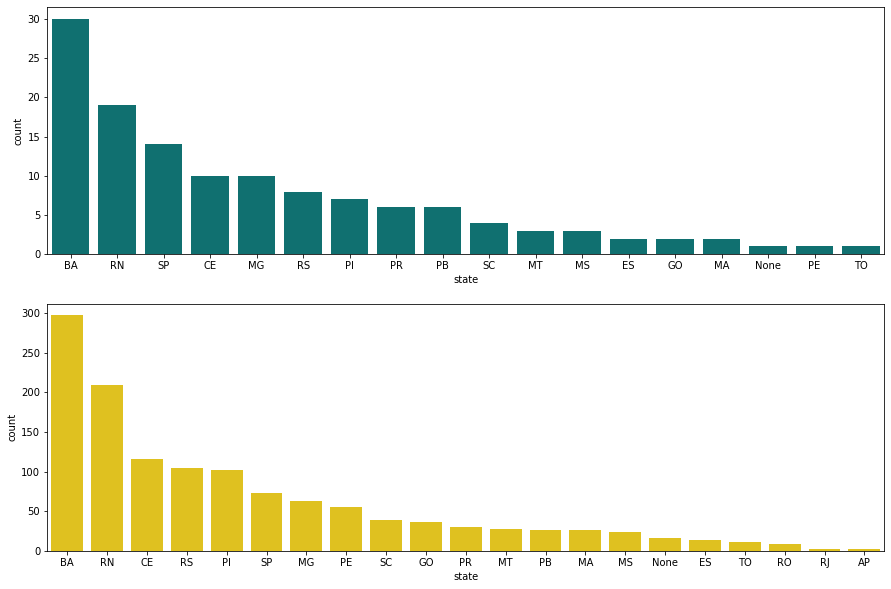

In [18]:
#Step 8: Make plots to compare
reversefactor = dict(zip(range(20),definitions2))
df.state = np.vectorize(reversefactor.get)(df.state)
df.state
f, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=False);
sns.countplot(x=df2["state"] , color="teal", order = df2['state'].value_counts().index, ax=axes[0]);
sns.countplot(x=df["state"] , color="gold", order = df['state'].value_counts().index, ax=axes[1]);

### An analysis of the metrics

#### Accuracy score

In [19]:
# The accuracy score substantially larger as when many parameters are tuned
accuracy_score(y_test, y_pred)


0.5813953488372093

#### The confusion matrix 

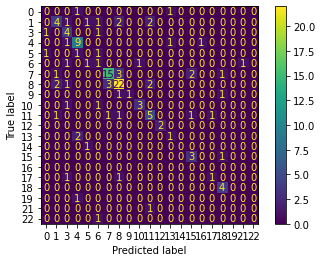

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

#### The statistics obtained from the confusion matrix for the multiclass problem are calculated as follows:
- Precision = TP/(TP+FP)
- Recall = TP(TP+FN)

<img width="50%" height="50%" align="left" src="confusionmatrix2.png"> 

In [21]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.36      0.42        11
           3       0.40      0.67      0.50         6
           4       0.64      0.75      0.69        12
           5       0.00      0.00      0.00         3
           6       0.17      0.20      0.18         5
           7       0.79      0.68      0.73        22
           8       0.73      0.73      0.73        30
           9       1.00      0.33      0.50         3
          10       0.75      0.60      0.67         5
          11       0.50      0.50      0.50        10
          12       1.00      1.00      1.00         2
          13       0.33      0.33      0.33         3
          14       0.00      0.00      0.00         1
          15       0.50      0.75      0.60         4
          16       0.00      0.00      0.00         0
          17       0.50      0.33      0.40         3
          18       0.57    

#### Key conclusions

##### The results are quiet satisfactory in terms of obtaining a diverse and unexpected prediction of possible states. This has been obtained by including the "class_weight='balanced'". However, the accuracy was not that high.  